# 7:3 Train/Test Ratio

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [2]:
# Read data file
data = pd.read_csv('ACB.csv')
df = data.reset_index()['Price']

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# Split train/test to train model
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

27/27 [==============================] - 6s 72ms/step - loss: 0.0085 - val_loss: 0.0023
Epoch 2/100
27/27 [==============================] - 1s 26ms/step - loss: 7.1311e-04 - val_loss: 0.0020
Epoch 3/100
27/27 [==============================] - 1s 24ms/step - loss: 4.1165e-04 - val_loss: 0.0023
Epoch 4/100
27/27 [==============================] - 1s 24ms/step - loss: 3.9538e-04 - val_loss: 0.0023
Epoch 5/100
27/27 [==============================] - 1s 35ms/step - loss: 3.6915e-04 - val_loss: 0.0017
Epoch 6/100
27/27 [==============================] - 1s 32ms/step - loss: 3.6593e-04 - val_loss: 0.0025
Epoch 7/100
27/27 [==============================] - 1s 32ms/step - loss: 3.2942e-04 - val_loss: 0.0033
Epoch 8/100
27/27 [==============================] - 1s 28ms/step - loss: 3.1666e-04 - val_loss: 0.0037
Epoch 9/100
27/27 [==============================] - 1s 26ms/step - loss: 3.3144e-04 - val_loss: 0.0034
Epoch 10/100
27/27 [==============================] - 1s 31ms/step 

27/27 [==============================] - 1s 23ms/step - loss: 6.9970e-05 - val_loss: 3.8323e-04
Epoch 76/100
27/27 [==============================] - 1s 23ms/step - loss: 8.0499e-05 - val_loss: 5.8751e-04
Epoch 77/100
27/27 [==============================] - 1s 23ms/step - loss: 7.8635e-05 - val_loss: 3.8264e-04
Epoch 78/100
27/27 [==============================] - 1s 23ms/step - loss: 7.2161e-05 - val_loss: 5.5503e-04
Epoch 79/100
27/27 [==============================] - 1s 23ms/step - loss: 6.2654e-05 - val_loss: 7.9595e-04
Epoch 80/100
27/27 [==============================] - 1s 23ms/step - loss: 7.5503e-05 - val_loss: 4.5035e-04
Epoch 81/100
27/27 [==============================] - 1s 23ms/step - loss: 8.0352e-05 - val_loss: 4.6986e-04
Epoch 82/100
27/27 [==============================] - 1s 23ms/step - loss: 6.8474e-05 - val_loss: 3.7115e-04
Epoch 83/100
27/27 [==============================] - 1s 23ms/step - loss: 7.7698e-05 - val_loss: 4.2096e-04
Epoch 84/100
27/27 [============

In [10]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

23/23 [==============================] - 1s 6ms/step


In [11]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [12]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 665.5762
MAPE trên tập test là: 2.1868109703063965
MSLE trên tập test là: 0.00073020405


In [13]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.74495196]
689
1 day input [0.65824234 0.65824234 0.67153795 0.69087702 0.6932944  0.6932944
 0.68483356 0.68483356 0.68483356 0.70296394 0.68966833 0.68966833
 0.67153795 0.65340757 0.66791187 0.66549449 0.63890326 0.66065972
 0.65824234 0.67516402 0.67032926 0.69087702 0.68604225 0.70659002
 0.6945031  0.70417263 0.72834647 0.71867694 0.72713778 0.72834647
 0.73438993 0.73680732 0.72955516 0.73801601 0.75735508 0.75977246
 0.75977246 0.77185938 0.78273761 0.77669415 0.79361584 0.85405044
 0.87097213 0.93140673 0.96283272 0.94832842 0.89272858 0.82504183
 0.87943297 0.88366339 0.90028291 0.88366339 0.92143502 0.90179377
 0.90783723 0.91085896 0.90330464 0.93050021 0.9350328  0.94711972
 0.95165232 0.96222837 0.95467405 0.93201107 0.9395654  0.94409799
 1.         0.94107626 0.95769578 0.94711972 0.91690242 0.84287004
 0.84740263 0.81265274 0.84287004 0.86855474 0.82473966 0.87761993
 0.8745982  0.88366339 0.85042436 0.84135917 0.85495696 0.85495696
 0.88517426 0.94560886 0.92747848 

3 day output [[0.78989786]]
4 day input [0.69087702 0.6932944  0.6932944  0.68483356 0.68483356 0.68483356
 0.70296394 0.68966833 0.68966833 0.67153795 0.65340757 0.66791187
 0.66549449 0.63890326 0.66065972 0.65824234 0.67516402 0.67032926
 0.69087702 0.68604225 0.70659002 0.6945031  0.70417263 0.72834647
 0.71867694 0.72713778 0.72834647 0.73438993 0.73680732 0.72955516
 0.73801601 0.75735508 0.75977246 0.75977246 0.77185938 0.78273761
 0.77669415 0.79361584 0.85405044 0.87097213 0.93140673 0.96283272
 0.94832842 0.89272858 0.82504183 0.87943297 0.88366339 0.90028291
 0.88366339 0.92143502 0.90179377 0.90783723 0.91085896 0.90330464
 0.93050021 0.9350328  0.94711972 0.95165232 0.96222837 0.95467405
 0.93201107 0.9395654  0.94409799 1.         0.94107626 0.95769578
 0.94711972 0.91690242 0.84287004 0.84740263 0.81265274 0.84287004
 0.86855474 0.82473966 0.87761993 0.8745982  0.88366339 0.85042436
 0.84135917 0.85495696 0.85495696 0.88517426 0.94560886 0.92747848
 0.9350328  0.92596761

6 day output [[0.8322531]]
7 day input [0.68483356 0.68483356 0.68483356 0.70296394 0.68966833 0.68966833
 0.67153795 0.65340757 0.66791187 0.66549449 0.63890326 0.66065972
 0.65824234 0.67516402 0.67032926 0.69087702 0.68604225 0.70659002
 0.6945031  0.70417263 0.72834647 0.71867694 0.72713778 0.72834647
 0.73438993 0.73680732 0.72955516 0.73801601 0.75735508 0.75977246
 0.75977246 0.77185938 0.78273761 0.77669415 0.79361584 0.85405044
 0.87097213 0.93140673 0.96283272 0.94832842 0.89272858 0.82504183
 0.87943297 0.88366339 0.90028291 0.88366339 0.92143502 0.90179377
 0.90783723 0.91085896 0.90330464 0.93050021 0.9350328  0.94711972
 0.95165232 0.96222837 0.95467405 0.93201107 0.9395654  0.94409799
 1.         0.94107626 0.95769578 0.94711972 0.91690242 0.84287004
 0.84740263 0.81265274 0.84287004 0.86855474 0.82473966 0.87761993
 0.8745982  0.88366339 0.85042436 0.84135917 0.85495696 0.85495696
 0.88517426 0.94560886 0.92747848 0.9350328  0.92596761 0.94107626
 0.92747848 0.95618491 

9 day output [[0.8798011]]
10 day input [0.70296394 0.68966833 0.68966833 0.67153795 0.65340757 0.66791187
 0.66549449 0.63890326 0.66065972 0.65824234 0.67516402 0.67032926
 0.69087702 0.68604225 0.70659002 0.6945031  0.70417263 0.72834647
 0.71867694 0.72713778 0.72834647 0.73438993 0.73680732 0.72955516
 0.73801601 0.75735508 0.75977246 0.75977246 0.77185938 0.78273761
 0.77669415 0.79361584 0.85405044 0.87097213 0.93140673 0.96283272
 0.94832842 0.89272858 0.82504183 0.87943297 0.88366339 0.90028291
 0.88366339 0.92143502 0.90179377 0.90783723 0.91085896 0.90330464
 0.93050021 0.9350328  0.94711972 0.95165232 0.96222837 0.95467405
 0.93201107 0.9395654  0.94409799 1.         0.94107626 0.95769578
 0.94711972 0.91690242 0.84287004 0.84740263 0.81265274 0.84287004
 0.86855474 0.82473966 0.87761993 0.8745982  0.88366339 0.85042436
 0.84135917 0.85495696 0.85495696 0.88517426 0.94560886 0.92747848
 0.9350328  0.92596761 0.94107626 0.92747848 0.95618491 0.95618491
 0.94107626 0.91992415

12 day output [[0.9338692]]
13 day input [0.67153795 0.65340757 0.66791187 0.66549449 0.63890326 0.66065972
 0.65824234 0.67516402 0.67032926 0.69087702 0.68604225 0.70659002
 0.6945031  0.70417263 0.72834647 0.71867694 0.72713778 0.72834647
 0.73438993 0.73680732 0.72955516 0.73801601 0.75735508 0.75977246
 0.75977246 0.77185938 0.78273761 0.77669415 0.79361584 0.85405044
 0.87097213 0.93140673 0.96283272 0.94832842 0.89272858 0.82504183
 0.87943297 0.88366339 0.90028291 0.88366339 0.92143502 0.90179377
 0.90783723 0.91085896 0.90330464 0.93050021 0.9350328  0.94711972
 0.95165232 0.96222837 0.95467405 0.93201107 0.9395654  0.94409799
 1.         0.94107626 0.95769578 0.94711972 0.91690242 0.84287004
 0.84740263 0.81265274 0.84287004 0.86855474 0.82473966 0.87761993
 0.8745982  0.88366339 0.85042436 0.84135917 0.85495696 0.85495696
 0.88517426 0.94560886 0.92747848 0.9350328  0.92596761 0.94107626
 0.92747848 0.95618491 0.95618491 0.94107626 0.91992415 0.92143502
 0.93201107 0.9289893

15 day output [[0.99257076]]
16 day input [0.66549449 0.63890326 0.66065972 0.65824234 0.67516402 0.67032926
 0.69087702 0.68604225 0.70659002 0.6945031  0.70417263 0.72834647
 0.71867694 0.72713778 0.72834647 0.73438993 0.73680732 0.72955516
 0.73801601 0.75735508 0.75977246 0.75977246 0.77185938 0.78273761
 0.77669415 0.79361584 0.85405044 0.87097213 0.93140673 0.96283272
 0.94832842 0.89272858 0.82504183 0.87943297 0.88366339 0.90028291
 0.88366339 0.92143502 0.90179377 0.90783723 0.91085896 0.90330464
 0.93050021 0.9350328  0.94711972 0.95165232 0.96222837 0.95467405
 0.93201107 0.9395654  0.94409799 1.         0.94107626 0.95769578
 0.94711972 0.91690242 0.84287004 0.84740263 0.81265274 0.84287004
 0.86855474 0.82473966 0.87761993 0.8745982  0.88366339 0.85042436
 0.84135917 0.85495696 0.85495696 0.88517426 0.94560886 0.92747848
 0.9350328  0.92596761 0.94107626 0.92747848 0.95618491 0.95618491
 0.94107626 0.91992415 0.92143502 0.93201107 0.92898934 0.92747848
 0.91992415 0.868554

18 day output [[1.0557503]]
19 day input [0.65824234 0.67516402 0.67032926 0.69087702 0.68604225 0.70659002
 0.6945031  0.70417263 0.72834647 0.71867694 0.72713778 0.72834647
 0.73438993 0.73680732 0.72955516 0.73801601 0.75735508 0.75977246
 0.75977246 0.77185938 0.78273761 0.77669415 0.79361584 0.85405044
 0.87097213 0.93140673 0.96283272 0.94832842 0.89272858 0.82504183
 0.87943297 0.88366339 0.90028291 0.88366339 0.92143502 0.90179377
 0.90783723 0.91085896 0.90330464 0.93050021 0.9350328  0.94711972
 0.95165232 0.96222837 0.95467405 0.93201107 0.9395654  0.94409799
 1.         0.94107626 0.95769578 0.94711972 0.91690242 0.84287004
 0.84740263 0.81265274 0.84287004 0.86855474 0.82473966 0.87761993
 0.8745982  0.88366339 0.85042436 0.84135917 0.85495696 0.85495696
 0.88517426 0.94560886 0.92747848 0.9350328  0.92596761 0.94107626
 0.92747848 0.95618491 0.95618491 0.94107626 0.91992415 0.92143502
 0.93201107 0.92898934 0.92747848 0.91992415 0.86855474 0.82020706
 0.82927225 0.8338048

21 day output [[1.1225485]]
22 day input [0.69087702 0.68604225 0.70659002 0.6945031  0.70417263 0.72834647
 0.71867694 0.72713778 0.72834647 0.73438993 0.73680732 0.72955516
 0.73801601 0.75735508 0.75977246 0.75977246 0.77185938 0.78273761
 0.77669415 0.79361584 0.85405044 0.87097213 0.93140673 0.96283272
 0.94832842 0.89272858 0.82504183 0.87943297 0.88366339 0.90028291
 0.88366339 0.92143502 0.90179377 0.90783723 0.91085896 0.90330464
 0.93050021 0.9350328  0.94711972 0.95165232 0.96222837 0.95467405
 0.93201107 0.9395654  0.94409799 1.         0.94107626 0.95769578
 0.94711972 0.91690242 0.84287004 0.84740263 0.81265274 0.84287004
 0.86855474 0.82473966 0.87761993 0.8745982  0.88366339 0.85042436
 0.84135917 0.85495696 0.85495696 0.88517426 0.94560886 0.92747848
 0.9350328  0.92596761 0.94107626 0.92747848 0.95618491 0.95618491
 0.94107626 0.91992415 0.92143502 0.93201107 0.92898934 0.92747848
 0.91992415 0.86855474 0.82020706 0.82927225 0.83380485 0.8186962
 0.81265274 0.82473966

24 day output [[1.1913023]]
25 day input [0.6945031  0.70417263 0.72834647 0.71867694 0.72713778 0.72834647
 0.73438993 0.73680732 0.72955516 0.73801601 0.75735508 0.75977246
 0.75977246 0.77185938 0.78273761 0.77669415 0.79361584 0.85405044
 0.87097213 0.93140673 0.96283272 0.94832842 0.89272858 0.82504183
 0.87943297 0.88366339 0.90028291 0.88366339 0.92143502 0.90179377
 0.90783723 0.91085896 0.90330464 0.93050021 0.9350328  0.94711972
 0.95165232 0.96222837 0.95467405 0.93201107 0.9395654  0.94409799
 1.         0.94107626 0.95769578 0.94711972 0.91690242 0.84287004
 0.84740263 0.81265274 0.84287004 0.86855474 0.82473966 0.87761993
 0.8745982  0.88366339 0.85042436 0.84135917 0.85495696 0.85495696
 0.88517426 0.94560886 0.92747848 0.9350328  0.92596761 0.94107626
 0.92747848 0.95618491 0.95618491 0.94107626 0.91992415 0.92143502
 0.93201107 0.92898934 0.92747848 0.91992415 0.86855474 0.82020706
 0.82927225 0.83380485 0.8186962  0.81265274 0.82473966 0.82020706
 0.82020706 0.8217179

27 day output [[1.2598283]]
28 day input [0.71867694 0.72713778 0.72834647 0.73438993 0.73680732 0.72955516
 0.73801601 0.75735508 0.75977246 0.75977246 0.77185938 0.78273761
 0.77669415 0.79361584 0.85405044 0.87097213 0.93140673 0.96283272
 0.94832842 0.89272858 0.82504183 0.87943297 0.88366339 0.90028291
 0.88366339 0.92143502 0.90179377 0.90783723 0.91085896 0.90330464
 0.93050021 0.9350328  0.94711972 0.95165232 0.96222837 0.95467405
 0.93201107 0.9395654  0.94409799 1.         0.94107626 0.95769578
 0.94711972 0.91690242 0.84287004 0.84740263 0.81265274 0.84287004
 0.86855474 0.82473966 0.87761993 0.8745982  0.88366339 0.85042436
 0.84135917 0.85495696 0.85495696 0.88517426 0.94560886 0.92747848
 0.9350328  0.92596761 0.94107626 0.92747848 0.95618491 0.95618491
 0.94107626 0.91992415 0.92143502 0.93201107 0.92898934 0.92747848
 0.91992415 0.86855474 0.82020706 0.82927225 0.83380485 0.8186962
 0.81265274 0.82473966 0.82020706 0.82020706 0.82171793 0.83531571
 0.82473966 0.83380485

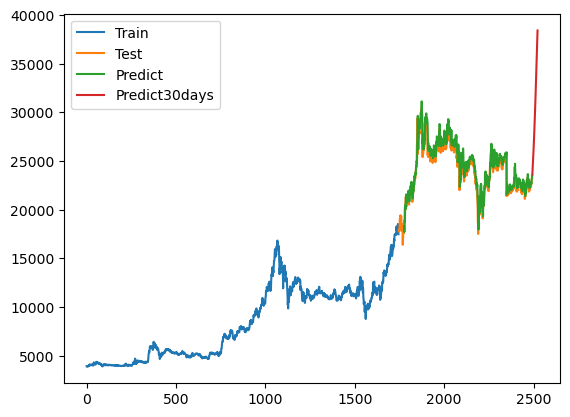

In [14]:
# Plot 
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 8:2 Train/Test Ratio

In [15]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [16]:
# Read data file
data = pd.read_csv('ACB.csv')
df = data.reset_index()['Price']
df

0        3910.0
1        3910.0
2        3885.1
3        3885.1
4        3910.0
         ...   
2488    22800.0
2489    23050.0
2490    23200.0
2491    23250.0
2492    23250.0
Name: Price, Length: 2493, dtype: float64

In [17]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [18]:
# Split train/test to train model
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [19]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 6s 48ms/step - loss: 0.0199 - val_loss: 0.0045
Epoch 2/100
31/31 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/100
31/31 [==============================] - 1s 22ms/step - loss: 6.7780e-04 - val_loss: 0.0019
Epoch 4/100
31/31 [==============================] - 1s 22ms/step - loss: 7.0412e-04 - val_loss: 0.0037
Epoch 5/100
31/31 [==============================] - 1s 22ms/step - loss: 6.5036e-04 - val_loss: 0.0021
Epoch 6/100
31/31 [==============================] - 1s 22ms/step - loss: 6.5723e-04 - val_loss: 0.0016
Epoch 7/100
31/31 [==============================] - 1s 22ms/step - loss: 6.5359e-04 - val_loss: 0.0022
Epoch 8/100
31/31 [==============================] - 1s 22ms/step - loss: 7.0089e-04 - val_loss: 0.0027
Epoch 9/100
31/31 [==============================] - 1s 22ms/step - loss: 6.3902e-04 - val_loss: 0.0014
Epoch 10/100
31/31 [==============================] - 1s 25ms/step - los

31/31 [==============================] - 1s 22ms/step - loss: 1.6490e-04 - val_loss: 3.9690e-04
Epoch 78/100
31/31 [==============================] - 1s 23ms/step - loss: 1.5165e-04 - val_loss: 4.9840e-04
Epoch 79/100
31/31 [==============================] - 1s 23ms/step - loss: 1.3878e-04 - val_loss: 3.8927e-04
Epoch 80/100
31/31 [==============================] - 1s 22ms/step - loss: 1.4613e-04 - val_loss: 5.4225e-04
Epoch 81/100
31/31 [==============================] - 1s 23ms/step - loss: 1.3950e-04 - val_loss: 3.8651e-04
Epoch 82/100
31/31 [==============================] - 1s 24ms/step - loss: 1.4700e-04 - val_loss: 5.0297e-04
Epoch 83/100
31/31 [==============================] - 1s 23ms/step - loss: 1.2988e-04 - val_loss: 7.8140e-04
Epoch 84/100
31/31 [==============================] - 1s 23ms/step - loss: 1.5350e-04 - val_loss: 6.1817e-04
Epoch 85/100
31/31 [==============================] - 1s 24ms/step - loss: 1.6663e-04 - val_loss: 4.5743e-04
Epoch 86/100
31/31 [============

In [24]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

15/15 [==============================] - 1s 6ms/step


In [25]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [26]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 500.7022
MAPE trên tập test là: 1.4641142450273037
MSLE trên tập test là: 0.0004794593


In [27]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.73505974]
440
1 day input [0.83078312 0.83833744 0.85193523 0.86251128 0.86553301 0.85042436
 0.85646782 0.86855474 0.87610907 0.86402215 0.87006561 0.8745982
 0.86704388 0.8443809  0.80963101 0.81718533 0.80509841 0.82927225
 0.77488111 0.78696803 0.78696803 0.78998976 0.84135917 0.81265274
 0.81114187 0.78998976 0.77790284 0.7839463  0.80812014 0.74466381
 0.68422921 0.68725094 0.73710949 0.7280443  0.71746824 0.73106603
 0.71293565 0.7235117  0.75977246 0.77034852 0.8141636  0.8186962
 0.80660928 0.79301149 0.81076416 0.80887558 0.80887558 0.79565551
 0.82398423 0.82587281 0.80509841 0.7559953  0.76354963 0.74466381
 0.76354963 0.725778   0.71822368 0.72200084 0.75032956 0.75032956
 0.75221814 0.75788388 0.77865828 0.76732679 0.75977246 0.76166104
 0.76921537 0.7767697  0.76732679 0.76543821 0.75977246 0.74088665
 0.75977246 0.75977246 0.76166104 0.75977246 0.7559953  0.7559953
 0.77110395 0.78432402 0.77299253 0.76166104 0.76166104 0.76732679
 0.7767697  0.78243544 0.79754409 0.

3 day output [[0.7454654]]
4 day input [0.86251128 0.86553301 0.85042436 0.85646782 0.86855474 0.87610907
 0.86402215 0.87006561 0.8745982  0.86704388 0.8443809  0.80963101
 0.81718533 0.80509841 0.82927225 0.77488111 0.78696803 0.78696803
 0.78998976 0.84135917 0.81265274 0.81114187 0.78998976 0.77790284
 0.7839463  0.80812014 0.74466381 0.68422921 0.68725094 0.73710949
 0.7280443  0.71746824 0.73106603 0.71293565 0.7235117  0.75977246
 0.77034852 0.8141636  0.8186962  0.80660928 0.79301149 0.81076416
 0.80887558 0.80887558 0.79565551 0.82398423 0.82587281 0.80509841
 0.7559953  0.76354963 0.74466381 0.76354963 0.725778   0.71822368
 0.72200084 0.75032956 0.75032956 0.75221814 0.75788388 0.77865828
 0.76732679 0.75977246 0.76166104 0.76921537 0.7767697  0.76732679
 0.76543821 0.75977246 0.74088665 0.75977246 0.75977246 0.76166104
 0.75977246 0.7559953  0.7559953  0.77110395 0.78432402 0.77299253
 0.76166104 0.76166104 0.76732679 0.7767697  0.78243544 0.79754409
 0.79376693 0.79565551 

6 day output [[0.7566509]]
7 day input [0.85646782 0.86855474 0.87610907 0.86402215 0.87006561 0.8745982
 0.86704388 0.8443809  0.80963101 0.81718533 0.80509841 0.82927225
 0.77488111 0.78696803 0.78696803 0.78998976 0.84135917 0.81265274
 0.81114187 0.78998976 0.77790284 0.7839463  0.80812014 0.74466381
 0.68422921 0.68725094 0.73710949 0.7280443  0.71746824 0.73106603
 0.71293565 0.7235117  0.75977246 0.77034852 0.8141636  0.8186962
 0.80660928 0.79301149 0.81076416 0.80887558 0.80887558 0.79565551
 0.82398423 0.82587281 0.80509841 0.7559953  0.76354963 0.74466381
 0.76354963 0.725778   0.71822368 0.72200084 0.75032956 0.75032956
 0.75221814 0.75788388 0.77865828 0.76732679 0.75977246 0.76166104
 0.76921537 0.7767697  0.76732679 0.76543821 0.75977246 0.74088665
 0.75977246 0.75977246 0.76166104 0.75977246 0.7559953  0.7559953
 0.77110395 0.78432402 0.77299253 0.76166104 0.76166104 0.76732679
 0.7767697  0.78243544 0.79754409 0.79376693 0.79565551 0.79754409
 0.79187835 0.78810118 0.7

9 day output [[0.7653246]]
10 day input [0.86402215 0.87006561 0.8745982  0.86704388 0.8443809  0.80963101
 0.81718533 0.80509841 0.82927225 0.77488111 0.78696803 0.78696803
 0.78998976 0.84135917 0.81265274 0.81114187 0.78998976 0.77790284
 0.7839463  0.80812014 0.74466381 0.68422921 0.68725094 0.73710949
 0.7280443  0.71746824 0.73106603 0.71293565 0.7235117  0.75977246
 0.77034852 0.8141636  0.8186962  0.80660928 0.79301149 0.81076416
 0.80887558 0.80887558 0.79565551 0.82398423 0.82587281 0.80509841
 0.7559953  0.76354963 0.74466381 0.76354963 0.725778   0.71822368
 0.72200084 0.75032956 0.75032956 0.75221814 0.75788388 0.77865828
 0.76732679 0.75977246 0.76166104 0.76921537 0.7767697  0.76732679
 0.76543821 0.75977246 0.74088665 0.75977246 0.75977246 0.76166104
 0.75977246 0.7559953  0.7559953  0.77110395 0.78432402 0.77299253
 0.76166104 0.76166104 0.76732679 0.7767697  0.78243544 0.79754409
 0.79376693 0.79565551 0.79754409 0.79187835 0.78810118 0.79565551
 0.79187835 0.78810118

12 day output [[0.7738252]]
13 day input [0.86704388 0.8443809  0.80963101 0.81718533 0.80509841 0.82927225
 0.77488111 0.78696803 0.78696803 0.78998976 0.84135917 0.81265274
 0.81114187 0.78998976 0.77790284 0.7839463  0.80812014 0.74466381
 0.68422921 0.68725094 0.73710949 0.7280443  0.71746824 0.73106603
 0.71293565 0.7235117  0.75977246 0.77034852 0.8141636  0.8186962
 0.80660928 0.79301149 0.81076416 0.80887558 0.80887558 0.79565551
 0.82398423 0.82587281 0.80509841 0.7559953  0.76354963 0.74466381
 0.76354963 0.725778   0.71822368 0.72200084 0.75032956 0.75032956
 0.75221814 0.75788388 0.77865828 0.76732679 0.75977246 0.76166104
 0.76921537 0.7767697  0.76732679 0.76543821 0.75977246 0.74088665
 0.75977246 0.75977246 0.76166104 0.75977246 0.7559953  0.7559953
 0.77110395 0.78432402 0.77299253 0.76166104 0.76166104 0.76732679
 0.7767697  0.78243544 0.79754409 0.79376693 0.79565551 0.79754409
 0.79187835 0.78810118 0.79565551 0.79187835 0.78810118 0.78998976
 0.79565551 0.79187835 

15 day output [[0.7820635]]
16 day input [0.81718533 0.80509841 0.82927225 0.77488111 0.78696803 0.78696803
 0.78998976 0.84135917 0.81265274 0.81114187 0.78998976 0.77790284
 0.7839463  0.80812014 0.74466381 0.68422921 0.68725094 0.73710949
 0.7280443  0.71746824 0.73106603 0.71293565 0.7235117  0.75977246
 0.77034852 0.8141636  0.8186962  0.80660928 0.79301149 0.81076416
 0.80887558 0.80887558 0.79565551 0.82398423 0.82587281 0.80509841
 0.7559953  0.76354963 0.74466381 0.76354963 0.725778   0.71822368
 0.72200084 0.75032956 0.75032956 0.75221814 0.75788388 0.77865828
 0.76732679 0.75977246 0.76166104 0.76921537 0.7767697  0.76732679
 0.76543821 0.75977246 0.74088665 0.75977246 0.75977246 0.76166104
 0.75977246 0.7559953  0.7559953  0.77110395 0.78432402 0.77299253
 0.76166104 0.76166104 0.76732679 0.7767697  0.78243544 0.79754409
 0.79376693 0.79565551 0.79754409 0.79187835 0.78810118 0.79565551
 0.79187835 0.78810118 0.78998976 0.79565551 0.79187835 0.79565551
 0.80320983 0.7918783

18 day output [[0.78981173]]
19 day input [0.77488111 0.78696803 0.78696803 0.78998976 0.84135917 0.81265274
 0.81114187 0.78998976 0.77790284 0.7839463  0.80812014 0.74466381
 0.68422921 0.68725094 0.73710949 0.7280443  0.71746824 0.73106603
 0.71293565 0.7235117  0.75977246 0.77034852 0.8141636  0.8186962
 0.80660928 0.79301149 0.81076416 0.80887558 0.80887558 0.79565551
 0.82398423 0.82587281 0.80509841 0.7559953  0.76354963 0.74466381
 0.76354963 0.725778   0.71822368 0.72200084 0.75032956 0.75032956
 0.75221814 0.75788388 0.77865828 0.76732679 0.75977246 0.76166104
 0.76921537 0.7767697  0.76732679 0.76543821 0.75977246 0.74088665
 0.75977246 0.75977246 0.76166104 0.75977246 0.7559953  0.7559953
 0.77110395 0.78432402 0.77299253 0.76166104 0.76166104 0.76732679
 0.7767697  0.78243544 0.79754409 0.79376693 0.79565551 0.79754409
 0.79187835 0.78810118 0.79565551 0.79187835 0.78810118 0.78998976
 0.79565551 0.79187835 0.79565551 0.80320983 0.79187835 0.78432402
 0.78998976 0.79187835

21 day output [[0.79729813]]
22 day input [0.78998976 0.84135917 0.81265274 0.81114187 0.78998976 0.77790284
 0.7839463  0.80812014 0.74466381 0.68422921 0.68725094 0.73710949
 0.7280443  0.71746824 0.73106603 0.71293565 0.7235117  0.75977246
 0.77034852 0.8141636  0.8186962  0.80660928 0.79301149 0.81076416
 0.80887558 0.80887558 0.79565551 0.82398423 0.82587281 0.80509841
 0.7559953  0.76354963 0.74466381 0.76354963 0.725778   0.71822368
 0.72200084 0.75032956 0.75032956 0.75221814 0.75788388 0.77865828
 0.76732679 0.75977246 0.76166104 0.76921537 0.7767697  0.76732679
 0.76543821 0.75977246 0.74088665 0.75977246 0.75977246 0.76166104
 0.75977246 0.7559953  0.7559953  0.77110395 0.78432402 0.77299253
 0.76166104 0.76166104 0.76732679 0.7767697  0.78243544 0.79754409
 0.79376693 0.79565551 0.79754409 0.79187835 0.78810118 0.79565551
 0.79187835 0.78810118 0.78998976 0.79565551 0.79187835 0.79565551
 0.80320983 0.79187835 0.78432402 0.78998976 0.79187835 0.79754409
 0.78998976 0.780546

24 day output [[0.80453473]]
25 day input [0.81114187 0.78998976 0.77790284 0.7839463  0.80812014 0.74466381
 0.68422921 0.68725094 0.73710949 0.7280443  0.71746824 0.73106603
 0.71293565 0.7235117  0.75977246 0.77034852 0.8141636  0.8186962
 0.80660928 0.79301149 0.81076416 0.80887558 0.80887558 0.79565551
 0.82398423 0.82587281 0.80509841 0.7559953  0.76354963 0.74466381
 0.76354963 0.725778   0.71822368 0.72200084 0.75032956 0.75032956
 0.75221814 0.75788388 0.77865828 0.76732679 0.75977246 0.76166104
 0.76921537 0.7767697  0.76732679 0.76543821 0.75977246 0.74088665
 0.75977246 0.75977246 0.76166104 0.75977246 0.7559953  0.7559953
 0.77110395 0.78432402 0.77299253 0.76166104 0.76166104 0.76732679
 0.7767697  0.78243544 0.79754409 0.79376693 0.79565551 0.79754409
 0.79187835 0.78810118 0.79565551 0.79187835 0.78810118 0.78998976
 0.79565551 0.79187835 0.79565551 0.80320983 0.79187835 0.78432402
 0.78998976 0.79187835 0.79754409 0.78998976 0.78054686 0.78054686
 0.78432402 0.77865828

27 day output [[0.81147015]]
28 day input [0.7839463  0.80812014 0.74466381 0.68422921 0.68725094 0.73710949
 0.7280443  0.71746824 0.73106603 0.71293565 0.7235117  0.75977246
 0.77034852 0.8141636  0.8186962  0.80660928 0.79301149 0.81076416
 0.80887558 0.80887558 0.79565551 0.82398423 0.82587281 0.80509841
 0.7559953  0.76354963 0.74466381 0.76354963 0.725778   0.71822368
 0.72200084 0.75032956 0.75032956 0.75221814 0.75788388 0.77865828
 0.76732679 0.75977246 0.76166104 0.76921537 0.7767697  0.76732679
 0.76543821 0.75977246 0.74088665 0.75977246 0.75977246 0.76166104
 0.75977246 0.7559953  0.7559953  0.77110395 0.78432402 0.77299253
 0.76166104 0.76166104 0.76732679 0.7767697  0.78243544 0.79754409
 0.79376693 0.79565551 0.79754409 0.79187835 0.78810118 0.79565551
 0.79187835 0.78810118 0.78998976 0.79565551 0.79187835 0.79565551
 0.80320983 0.79187835 0.78432402 0.78998976 0.79187835 0.79754409
 0.78998976 0.78054686 0.78054686 0.78432402 0.77865828 0.78432402
 0.77110395 0.759772

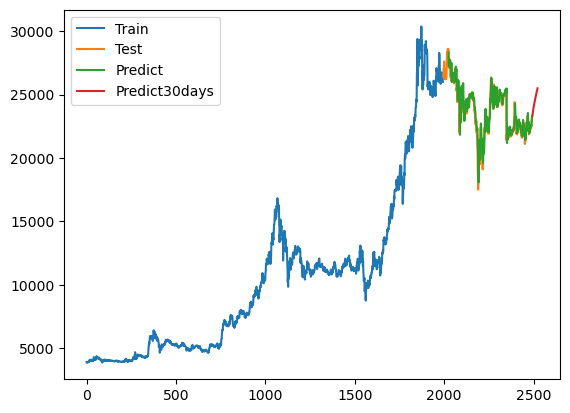

In [28]:
# Plot 
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 9:1 Train/Test Ratio

In [29]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [30]:
# Read data file
data = pd.read_csv('ACB.csv')
df = data.reset_index()['Price']
df

0        3910.0
1        3910.0
2        3885.1
3        3885.1
4        3910.0
         ...   
2488    22800.0
2489    23050.0
2490    23200.0
2491    23250.0
2492    23250.0
Name: Price, Length: 2493, dtype: float64

In [31]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
# Split train/test to train model
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [33]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [35]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 [==============================] - 5s 44ms/step - loss: 0.0247 - val_loss: 0.0035
Epoch 2/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0011 - val_loss: 9.8984e-04
Epoch 3/100
35/35 [==============================] - 1s 26ms/step - loss: 8.5954e-04 - val_loss: 0.0010
Epoch 4/100
35/35 [==============================] - 1s 27ms/step - loss: 8.6654e-04 - val_loss: 9.3401e-04
Epoch 5/100
35/35 [==============================] - 1s 30ms/step - loss: 8.3440e-04 - val_loss: 0.0011
Epoch 6/100
35/35 [==============================] - 1s 27ms/step - loss: 8.3501e-04 - val_loss: 9.1332e-04
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 8.0830e-04 - val_loss: 0.0012
Epoch 8/100
35/35 [==============================] - 1s 26ms/step - loss: 7.7725e-04 - val_loss: 8.8911e-04
Epoch 9/100
35/35 [==============================] - 1s 27ms/step - loss: 8.4993e-04 - val_loss: 9.6139e-04
Epoch 10/100
35/35 [==============================] 

35/35 [==============================] - 1s 20ms/step - loss: 2.0779e-04 - val_loss: 2.9488e-04
Epoch 77/100
35/35 [==============================] - 1s 20ms/step - loss: 2.7320e-04 - val_loss: 2.3468e-04
Epoch 78/100
35/35 [==============================] - 1s 21ms/step - loss: 2.2073e-04 - val_loss: 3.6200e-04
Epoch 79/100
35/35 [==============================] - 1s 21ms/step - loss: 1.7662e-04 - val_loss: 4.8497e-04
Epoch 80/100
35/35 [==============================] - 1s 21ms/step - loss: 1.8805e-04 - val_loss: 2.3361e-04
Epoch 81/100
35/35 [==============================] - 1s 21ms/step - loss: 1.7821e-04 - val_loss: 2.7724e-04
Epoch 82/100
35/35 [==============================] - 1s 21ms/step - loss: 1.6300e-04 - val_loss: 3.1545e-04
Epoch 83/100
35/35 [==============================] - 1s 21ms/step - loss: 1.5631e-04 - val_loss: 2.3342e-04
Epoch 84/100
35/35 [==============================] - 1s 21ms/step - loss: 1.5537e-04 - val_loss: 3.5718e-04
Epoch 85/100
35/35 [============

In [38]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

7/7 [==============================] - 1s 6ms/step


In [39]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [40]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 522.4152
MAPE trên tập test là: 1.7230359837412834
MSLE trên tập test là: 0.00050113664


In [41]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.7445434]
191
1 day input [0.7767697  0.77488111 0.78243544 0.79754409 0.806987   0.80320983
 0.80887558 0.79376693 0.79943267 0.79754409 0.79565551 0.79187835
 0.79565551 0.79565551 0.79754409 0.78810118 0.77488111 0.76921537
 0.76921537 0.76732679 0.76543821 0.76543821 0.76543821 0.76732679
 0.7862126  0.78432402 0.79565551 0.79376693 0.79376693 0.79376693
 0.79754409 0.79754409 0.79754409 0.79376693 0.79754409 0.79565551
 0.79943267 0.81076416 0.80320983 0.80132125 0.79754409 0.80320983
 0.80509841 0.81265274 0.66156624 0.67667489 0.67478631 0.67667489
 0.67856347 0.66912056 0.66723198 0.66345482 0.66912056 0.67100914
 0.67289773 0.67667489 0.67100914 0.67100914 0.67289773 0.67100914
 0.68045205 0.69367212 0.69178354 0.6955607  0.68045205 0.68611779
 0.68611779 0.68422921 0.68234063 0.67289773 0.67289773 0.68234063
 0.68422921 0.67856347 0.68422921 0.68422921 0.68422921 0.68422921
 0.68422921 0.68422921 0.68800638 0.68611779 0.6955607  0.6955607
 0.68989496 0.69178354 0.72011226 0

4 day output [[0.79439336]]
5 day input [0.806987   0.80320983 0.80887558 0.79376693 0.79943267 0.79754409
 0.79565551 0.79187835 0.79565551 0.79565551 0.79754409 0.78810118
 0.77488111 0.76921537 0.76921537 0.76732679 0.76543821 0.76543821
 0.76543821 0.76732679 0.7862126  0.78432402 0.79565551 0.79376693
 0.79376693 0.79376693 0.79754409 0.79754409 0.79754409 0.79376693
 0.79754409 0.79565551 0.79943267 0.81076416 0.80320983 0.80132125
 0.79754409 0.80320983 0.80509841 0.81265274 0.66156624 0.67667489
 0.67478631 0.67667489 0.67856347 0.66912056 0.66723198 0.66345482
 0.66912056 0.67100914 0.67289773 0.67667489 0.67100914 0.67100914
 0.67289773 0.67100914 0.68045205 0.69367212 0.69178354 0.6955607
 0.68045205 0.68611779 0.68611779 0.68422921 0.68234063 0.67289773
 0.67289773 0.68234063 0.68422921 0.67856347 0.68422921 0.68422921
 0.68422921 0.68422921 0.68422921 0.68422921 0.68800638 0.68611779
 0.6955607  0.6955607  0.68989496 0.69178354 0.72011226 0.71633509
 0.725778   0.73899807 

8 day output [[0.8362322]]
9 day input [0.79943267 0.79754409 0.79565551 0.79187835 0.79565551 0.79565551
 0.79754409 0.78810118 0.77488111 0.76921537 0.76921537 0.76732679
 0.76543821 0.76543821 0.76543821 0.76732679 0.7862126  0.78432402
 0.79565551 0.79376693 0.79376693 0.79376693 0.79754409 0.79754409
 0.79754409 0.79376693 0.79754409 0.79565551 0.79943267 0.81076416
 0.80320983 0.80132125 0.79754409 0.80320983 0.80509841 0.81265274
 0.66156624 0.67667489 0.67478631 0.67667489 0.67856347 0.66912056
 0.66723198 0.66345482 0.66912056 0.67100914 0.67289773 0.67667489
 0.67100914 0.67100914 0.67289773 0.67100914 0.68045205 0.69367212
 0.69178354 0.6955607  0.68045205 0.68611779 0.68611779 0.68422921
 0.68234063 0.67289773 0.67289773 0.68234063 0.68422921 0.67856347
 0.68422921 0.68422921 0.68422921 0.68422921 0.68422921 0.68422921
 0.68800638 0.68611779 0.6955607  0.6955607  0.68989496 0.69178354
 0.72011226 0.71633509 0.725778   0.73899807 0.77488111 0.75032956
 0.73710949 0.72955516 

12 day output [[0.8756021]]
13 day input [0.79565551 0.79565551 0.79754409 0.78810118 0.77488111 0.76921537
 0.76921537 0.76732679 0.76543821 0.76543821 0.76543821 0.76732679
 0.7862126  0.78432402 0.79565551 0.79376693 0.79376693 0.79376693
 0.79754409 0.79754409 0.79754409 0.79376693 0.79754409 0.79565551
 0.79943267 0.81076416 0.80320983 0.80132125 0.79754409 0.80320983
 0.80509841 0.81265274 0.66156624 0.67667489 0.67478631 0.67667489
 0.67856347 0.66912056 0.66723198 0.66345482 0.66912056 0.67100914
 0.67289773 0.67667489 0.67100914 0.67100914 0.67289773 0.67100914
 0.68045205 0.69367212 0.69178354 0.6955607  0.68045205 0.68611779
 0.68611779 0.68422921 0.68234063 0.67289773 0.67289773 0.68234063
 0.68422921 0.67856347 0.68422921 0.68422921 0.68422921 0.68422921
 0.68422921 0.68422921 0.68800638 0.68611779 0.6955607  0.6955607
 0.68989496 0.69178354 0.72011226 0.71633509 0.725778   0.73899807
 0.77488111 0.75032956 0.73710949 0.72955516 0.71822368 0.71822368
 0.72388942 0.71633509

17 day output [[0.9184553]]
18 day input [0.76921537 0.76921537 0.76732679 0.76543821 0.76543821 0.76543821
 0.76732679 0.7862126  0.78432402 0.79565551 0.79376693 0.79376693
 0.79376693 0.79754409 0.79754409 0.79754409 0.79376693 0.79754409
 0.79565551 0.79943267 0.81076416 0.80320983 0.80132125 0.79754409
 0.80320983 0.80509841 0.81265274 0.66156624 0.67667489 0.67478631
 0.67667489 0.67856347 0.66912056 0.66723198 0.66345482 0.66912056
 0.67100914 0.67289773 0.67667489 0.67100914 0.67100914 0.67289773
 0.67100914 0.68045205 0.69367212 0.69178354 0.6955607  0.68045205
 0.68611779 0.68611779 0.68422921 0.68234063 0.67289773 0.67289773
 0.68234063 0.68422921 0.67856347 0.68422921 0.68422921 0.68422921
 0.68422921 0.68422921 0.68422921 0.68800638 0.68611779 0.6955607
 0.6955607  0.68989496 0.69178354 0.72011226 0.71633509 0.725778
 0.73899807 0.77488111 0.75032956 0.73710949 0.72955516 0.71822368
 0.71822368 0.72388942 0.71633509 0.71822368 0.71066935 0.68045205
 0.68422921 0.68611779 0

21 day output [[0.9480151]]
22 day input [0.76543821 0.76543821 0.76732679 0.7862126  0.78432402 0.79565551
 0.79376693 0.79376693 0.79376693 0.79754409 0.79754409 0.79754409
 0.79376693 0.79754409 0.79565551 0.79943267 0.81076416 0.80320983
 0.80132125 0.79754409 0.80320983 0.80509841 0.81265274 0.66156624
 0.67667489 0.67478631 0.67667489 0.67856347 0.66912056 0.66723198
 0.66345482 0.66912056 0.67100914 0.67289773 0.67667489 0.67100914
 0.67100914 0.67289773 0.67100914 0.68045205 0.69367212 0.69178354
 0.6955607  0.68045205 0.68611779 0.68611779 0.68422921 0.68234063
 0.67289773 0.67289773 0.68234063 0.68422921 0.67856347 0.68422921
 0.68422921 0.68422921 0.68422921 0.68422921 0.68422921 0.68800638
 0.68611779 0.6955607  0.6955607  0.68989496 0.69178354 0.72011226
 0.71633509 0.725778   0.73899807 0.77488111 0.75032956 0.73710949
 0.72955516 0.71822368 0.71822368 0.72388942 0.71633509 0.71822368
 0.71066935 0.68045205 0.68422921 0.68611779 0.67856347 0.68611779
 0.68234063 0.6861177

25 day output [[0.97436845]]
26 day input [0.78432402 0.79565551 0.79376693 0.79376693 0.79376693 0.79754409
 0.79754409 0.79754409 0.79376693 0.79754409 0.79565551 0.79943267
 0.81076416 0.80320983 0.80132125 0.79754409 0.80320983 0.80509841
 0.81265274 0.66156624 0.67667489 0.67478631 0.67667489 0.67856347
 0.66912056 0.66723198 0.66345482 0.66912056 0.67100914 0.67289773
 0.67667489 0.67100914 0.67100914 0.67289773 0.67100914 0.68045205
 0.69367212 0.69178354 0.6955607  0.68045205 0.68611779 0.68611779
 0.68422921 0.68234063 0.67289773 0.67289773 0.68234063 0.68422921
 0.67856347 0.68422921 0.68422921 0.68422921 0.68422921 0.68422921
 0.68422921 0.68800638 0.68611779 0.6955607  0.6955607  0.68989496
 0.69178354 0.72011226 0.71633509 0.725778   0.73899807 0.77488111
 0.75032956 0.73710949 0.72955516 0.71822368 0.71822368 0.72388942
 0.71633509 0.71822368 0.71066935 0.68045205 0.68422921 0.68611779
 0.67856347 0.68611779 0.68234063 0.68611779 0.68611779 0.70122644
 0.70689219 0.712557

29 day output [[0.99815464]]


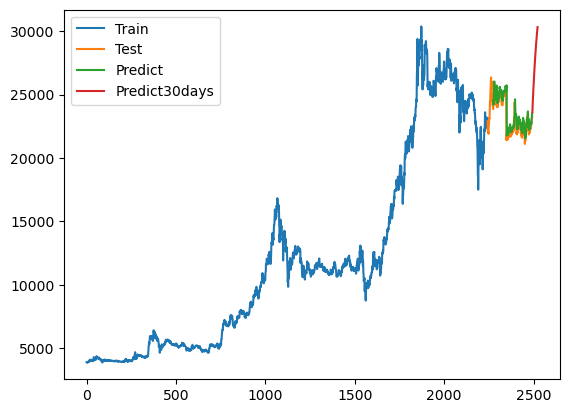

In [42]:
# Plot 
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()